# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: [Chocolate Bar 2020](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020)


Import the necessary libraries and create your dataframe(s).

In [1]:
#copied from checkpoint 2
#import needed libraires with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in dataset, 
# In my folder with checkpoint three, 
# I duplicate my chocolate.csv and renamed the copy chocolate_to_clean.csv

df = pd.read_csv("chocolate_to_clean.csv")

# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#check how complete data is
#Note that the only data that is missing is in columns second_taste, third_taste, and fourth_taste.
df.isna().sum()

Unnamed: 0                             0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [3]:
# From https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
# Part of the prep work for Data Cleaning Lesson, copy and paste -> kinda cool.

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
ref - 0%
company - 0%
company_location - 0%
review_date - 0%
country_of_bean_origin - 0%
specific_bean_origin_or_bar_name - 0%
cocoa_percent - 0%
rating - 0%
counts_of_ingredients - 0%
beans - 0%
cocoa_butter - 0%
vanilla - 0%
lecithin - 0%
salt - 0%
sugar - 0%
sweetener_without_sugar - 0%
first_taste - 0%
second_taste - 3%
third_taste - 28%
fourth_taste - 89%


In [4]:
# check to see the last 10 rows of the just the four taste columns
# NaN is used for missing values, ie Null.
# I want to be careful not to over clean my data and currently I don't think this will be an issue. 
# Might be helpful to use later is not null... for grouping and sorting data
# If it is a problem, I can come back and change(clean) it later( most likely fill it in with None)

taste = df[['first_taste', 'second_taste', 'third_taste',
       'fourth_taste']]
taste.tail(10)

,first_taste,second_taste,third_taste,fourth_taste
2214,smooth,intense blueberry,NaN,NaN
2215,creamy,caramel,salt,sweet
2216,woody,toast,pepper,NaN
2217,creamy,nutty,bready,NaN
2218,hint of smoke,fruit,NaN,NaN
2219,waxy,cloying,vegetal,NaN
2220,strong nutty,marshmallow,NaN,NaN
2221,muted,roasty,accessible,NaN
2222,fatty,mild nuts,mild fruit,NaN
2223,fatty,earthy,cocoa,NaN


In [5]:
# not sure what to do with the four taste columns - but leaving them as is for now.
# might have to do something with them for word clouds later on

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [6]:
# Depending on if a column is numeric or categorical with determine what method 
# to use for outliers

# find the datatype of each column
df.dtypes

Unnamed: 0                            int64
ref                                   int64
company                              object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
rating                              float64
counts_of_ingredients                 int64
beans                                object
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

In [7]:
# Checking the following columns for unique values
# Originally I checked all columns for unique values here
# I have kept the ones that I used to make decessions on Irregular Data.
# I moved the other code cells and comments to Unnecessary Data or Inconsistent Data below.
# I also found it very helpful to reference the Kaggle page where the dataset came from.

columns = [['country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'counts_of_ingredients']]
for c in columns:
    print(df[c].nunique())
    


country_of_bean_origin                62
specific_bean_origin_or_bar_name    1398
cocoa_percent                         46
counts_of_ingredients                  6
dtype: int64


In [8]:
# country_of_bean_origin
# Right Skewed
# Leaving as is

#bar graph
#df['country_of_bean_origin'].value_counts().plot.bar()

df['country_of_bean_origin'].describe()


count          2224
unique           62
top       Venezuela
freq            238
Name: country_of_bean_origin, dtype: object

In [9]:
# specific_bean_origin_or_bar_name
# checking on Kaggle this is province of chocolate bean
# leaving as is but changing column name

# bar graph
# Right Skewed
#df['specific_bean_origin_or_bar_name'].value_counts().plot.bar()



df['specific_bean_origin_or_bar_name'].describe()

count           2224
unique          1398
top       Madagascar
freq              52
Name: specific_bean_origin_or_bar_name, dtype: object

<AxesSubplot:>

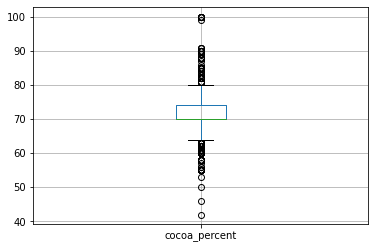

In [10]:
# cocoa_percent seems to be concentrated around 70%
# Leaving as is.

# cocoa_percent box plot 
df.boxplot(column=['cocoa_percent'])

In [11]:
# cocoa_percent histogram
# bin of 5 and 10 show a very different view then 25
#df['cocoa_percent'].hist(bins=25)

# Bar graph
# Right Skewed
#df['cocoa_percent'].value_counts().plot.bar()

# descriptive stats
df['cocoa_percent'].describe()

count    2224.000000
mean       71.493930
std         5.278253
min        42.000000
25%        70.000000
50%        70.000000
75%        74.000000
max       100.000000
Name: cocoa_percent, dtype: float64

In [12]:
# leaving the counts_of_ingrediant column along, though find it interesting that 5 bars have only one ingredient
# will make a note that the 5 bars with 1 ingredient and the 4 bars with 6 ingredients are outliers
df.counts_of_ingredients.value_counts()

3    909
2    665
4    450
5    191
1      5
6      4
Name: counts_of_ingredients, dtype: int64

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [13]:
# Ran this code for all columns originally under irregular data
# I've moved the code and comments that informed my decissions about Unnecessary Data here.
# Checking the following columns for unique values

columns = [['Unnamed: 0', 'ref', 'company', 'company_location', 'beans',]]
for c in columns:
    print(df[c].nunique())

Unnamed: 0          2224
ref                  571
company              502
company_location      66
beans                  1
dtype: int64


In [14]:
# beans -> all bars contain beans -> Delete column
df.beans.value_counts()

have_bean    2224
Name: beans, dtype: int64

In [15]:
# Unnamed: 0 -> 2224 unique values -> there are 2224 rows 
# Kaggle says this is index 
# was going to delete but have decided to keep -> its a small enough data set

In [16]:
# ref -> while it is numerical appears catagorical
# Accourding to Kaggle ref is a unique number for company
# Then why does company only have 502 unique values?
# As the code below, value counts for company the top 5 have larger numbers than the top 5 for ref
# Something is hinky -> deleting this column

# Plotted -> nothing special
#df['ref'].value_counts().plot.bar() 

df['ref'].value_counts()


414     10
24       9
1466     8
387      8
1458     8
        ..
597      1
855      1
853      1
849      1
1109     1
Name: ref, Length: 571, dtype: int64

In [17]:
# company  
# Keeping, making no changes -> not really thinking thinking I'll use this column, 
# but don't want to overclean my data

df['company'].value_counts()

Soma             52
Arete            32
Fresco           31
Bonnat           28
Pralus           26
                 ..
Boho              1
Soeka             1
Anahata           1
Malmo             1
Box Chocolate     1
Name: company, Length: 502, dtype: int64

In [18]:
# Deleting beans and ref columns 
# axis = 1 means column not row 
# inplace = True -> deletes the column permanently from original dataframe df
df = df.drop(columns=['beans', 'ref'],axis=1)


In [19]:
#check for duplicate rows
# the shape tells us there are no dublicate rows.

duplicate_check = pd.DataFrame(df, columns =['company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'])
  
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate_are = duplicate_check[duplicate_check.duplicated()]
 
# Print the resultant Dataframe    
print("Duplicate Rows :")
print(duplicate_are)
# Print the shape of duplicate_are
duplicate_are.shape

Duplicate Rows :
Empty DataFrame
Columns: [company, company_location, review_date, country_of_bean_origin, specific_bean_origin_or_bar_name, cocoa_percent, rating, counts_of_ingredients, beans, cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar, first_taste, second_taste, third_taste, fourth_taste]
Index: []


(0, 19)

In [20]:
#check dublicate row
# row 1671 and 1672 are the issue -> 
#did not originially compare tastes above and upon examination of the data below -> they are not duplicates
#Was able to add in the taste columns above and now get 0 dublicates
check_dup = df.loc[(df['counts_of_ingredients'] == 4) & (df['cocoa_percent'] == 75.0) & (df['review_date'] == 2019)]
#check_dup = (df.company == 'Parlus' and (df.specific_bean_orgin_or_bar_name == 'Papouasie')
#print(check_dup)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [21]:
# During my EDA I noticed 1 record at 2.6  

# Look at the ratings breakdown
df.rating.value_counts()

3.50    489
3.00    471
3.25    394
2.75    304
3.75    265
2.50    149
4.00    101
2.00     29
2.25     14
1.50      5
2.60      1
1.00      1
1.75      1
Name: rating, dtype: int64

Going to the kaggle site where I got my dataset([Chocolate Bar 2020](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020))

I find this explanation of the rating system in the Description of the dataset.

Flavors of Cacao Rating System:

Rating Scale

4.0 - 5.0 = Outstanding
3.5 - 3.9 = Highly Recommended
3.0 - 3.49 = Recommended
2.0 - 2.9 = Disappointing
1.0 - 1.9 = Unpleasant

*Not all the bars in each range are considered equal, so to show variance from bars in the same range I have assigned .25, .50 or .75.

In [22]:
# I infer that 2.6 is a typo and should be changed to 2.5

df['rating'] = df['rating'].replace([2.6], 2.5)

# Check if change was made
df.rating.value_counts()

3.50    489
3.00    471
3.25    394
2.75    304
3.75    265
2.50    150
4.00    101
2.00     29
2.25     14
1.50      5
1.00      1
1.75      1
Name: rating, dtype: int64

In [23]:
# Kaggle description dataset includes 66 countries 
# company_location matched - nothing to change/fix
print(df.company_location.nunique())

66


In [24]:
# review_date
# This data contains information from 2006 to 2020 according to Kaggle Decription
# This looks good, no change
df.review_date.value_counts()

2015    280
2014    243
2018    225
2016    215
2019    195
2012    180
2013    178
2011    153
2009    113
2017    102
2010     94
2008     84
2007     69
2006     60
2020     33
Name: review_date, dtype: int64

In [25]:
# Changed Code
# In checkpoint 4 -> creating a tableau story, I found it difficult to create the graphs I wanted,
# when i changed the values of cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar
# to 0's and 1's.  
df['cocoa_butter'] = df.cocoa_butter.replace({'have_cocoa_butter': 'Yes', 'have_not_cocoa_butter': 'No'})
df['vanilla'] = df.vanilla.replace({'have_vanila': 'Yes', 'have_not_vanila': 'No'})
df['lecithin'] = df.lecithin.replace({'have_lecithin': "Yes", 'have_not_lecithin': 'No'})
df['salt'] = df.salt.replace({'have_salt': 'Yes', 'have_not_salt': 'No'})
df['sugar'] = df.sugar.replace({'have_sugar': 'Yes', 'have_not_sugar': 'No'})
df['sweetener_without_sugar'] = df.sweetener_without_sugar.replace({'have_sweetener_without_sugar': 'Yes', 'have_not_sweetener_without_sugar': 'No'})

# Check to see if successfully changed colum data

have_havenot = df[['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar']]
have_havenot.head(50)

,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,Yes,No,No,No,Yes,No
1,Yes,No,No,No,Yes,No
2,Yes,No,No,No,Yes,No
3,Yes,No,Yes,No,Yes,No
4,Yes,No,Yes,No,Yes,No
5,Yes,No,Yes,No,Yes,No
6,Yes,No,No,No,Yes,No
7,Yes,No,Yes,No,Yes,No
8,Yes,No,Yes,No,Yes,No
9,Yes,No,Yes,No,Yes,No


In [26]:
# Original checkpoint 3 code part 1
# cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar
# these columns all have 2 values, either the bar has the column ingrediant or it does not
# from the eda decide to change have = 1 have not = 0


#df['cocoa_butter'] = df.cocoa_butter.replace({'have_cocoa_butter': 1, 'have_not_cocoa_butter': 0})
#df['vanilla'] = df.vanilla.replace({'have_vanilla': 1, 'have_not_vanilla': 0})
#df['lecithin'] = df.lecithin.replace({'have_lecithin': 1, 'have_not_lecithin': 0})
#df['salt'] = df.salt.replace({'have_salt': 1, 'have_not_salt': 0})
#df['sugar'] = df.sugar.replace({'have_sugar': 1, 'have_not_sugar': 0})
#df['sweetener_without_sugar'] = df.sweetener_without_sugar.replace({'have_sweetener_without_sugar': 1, 'have_sweetener_without_sugar': 0})


In [27]:
# Original checkpoint 3 code part 2
# check to see if successfully changed column data to 1's and 0's
# noticed have_not_vanilla is actually have_not_vanila and have_vanilla is have_vanila
# I also missed have_not_sweetener_without_sugar -> this is why its good to check what you have done


#have_havenot = df[['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']]
#have_havenot.head(25)


In [28]:
# Original checkpoint 3 code part 3
# Because I missed have_not_sweetner..
# I'm running value counts to see how have_sweetner_without_sugar for both 1 and 0 what actually happened?


#df.sweetener_without_sugar.value_counts()



In [29]:
# Original checkpoint 3 code part 4
# Now I can fix the sweetener_without_sugar column with the following code:
# First change the 0 to have_sweetener_without_sugar

#df['sweetener_without_sugar'] = df.sweetener_without_sugar.replace({0:'have_sweetener_without_sugar'})

# Check again

#df.sweetener_without_sugar.value_counts()

In [30]:
# Original checkpoint 3 code part 5
#Now run the correct code  for vanilla and sweetner_without_sugar and check again

#df['sweetener_without_sugar'] = df.sweetener_without_sugar.replace({'have_sweetener_without_sugar': 1, 'have_not_sweetener_without_sugar': 0})
#df['vanilla'] = df.vanilla.replace({'have_vanila': 1, 'have_not_vanila': 0})

#check sweetener_without_sugar

#df.sweetener_without_sugar.value_counts()

In [31]:
# Original checkpoint 3 code part 6
#check vanilla

#df.vanilla.value_counts()

In [32]:
# Renaming the following columns: 
# Unnamed: 0, country_of_bean_origin, specific_bean_origin_or_bar_name, counts_of_ingredients, sweetener_without_sugar

# Before renaming the columns
print(df.columns)
   
df.rename(columns = {'Unnamed: 0':'Index', 'country_of_bean_origin':'Bean_Country',
                              'specific_bean_origin_or_bar_name':'Bean_Province', 'counts_of_ingredients': 'num_ingredients', 'sweetener_without_sugar' : 'alternative_sweetener'}, inplace = True)
   
# After renaming the columns
print(df.columns)

Index(['Unnamed: 0', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'cocoa_butter',
       'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar',
       'first_taste', 'second_taste', 'third_taste', 'fourth_taste'],
      dtype='object')
Index(['Index', 'company', 'company_location', 'review_date', 'Bean_Country',
       'Bean_Province', 'cocoa_percent', 'rating', 'num_ingredients',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'alternative_sweetener', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')


In [33]:
df.head()

,Index,company,company_location,review_date,Bean_Country,Bean_Province,cocoa_percent,rating,num_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,alternative_sweetener,first_taste,second_taste,third_taste,fourth_taste
0,0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,Yes,No,No,No,Yes,No,cocoa,blackberry,full body,NaN
1,1,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,Yes,No,No,No,Yes,No,cocoa,vegetal,savory,NaN
2,2,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,Yes,No,No,No,Yes,No,rich cocoa,fatty,bready,NaN
3,3,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,Yes,No,Yes,No,Yes,No,fruity,melon,roasty,NaN
4,4,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,Yes,No,Yes,No,Yes,No,vegetal,nutty,NaN,NaN


In [34]:
#save cleaned dataset to a new csv
df.to_csv("chocolate_cleaned.csv")

In [35]:
# Check to see that it workded
df_cleaned = pd.read_csv("chocolate_cleaned.csv")

# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2224 non-null   int64  
 1   Index                  2224 non-null   int64  
 2   company                2224 non-null   object 
 3   company_location       2224 non-null   object 
 4   review_date            2224 non-null   int64  
 5   Bean_Country           2224 non-null   object 
 6   Bean_Province          2224 non-null   object 
 7   cocoa_percent          2224 non-null   float64
 8   rating                 2224 non-null   float64
 9   num_ingredients        2224 non-null   int64  
 10  cocoa_butter           2224 non-null   object 
 11  vanilla                2224 non-null   object 
 12  lecithin               2224 non-null   object 
 13  salt                   2224 non-null   object 
 14  sugar                  2224 non-null   object 
 15  alte

,Unnamed: 0,Index,company,company_location,review_date,Bean_Country,Bean_Province,cocoa_percent,rating,num_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,alternative_sweetener,first_taste,second_taste,third_taste,fourth_taste
0,0,0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,Yes,No,No,No,Yes,No,cocoa,blackberry,full body,NaN
1,1,1,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,Yes,No,No,No,Yes,No,cocoa,vegetal,savory,NaN
2,2,2,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,Yes,No,No,No,Yes,No,rich cocoa,fatty,bready,NaN
3,3,3,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,Yes,No,Yes,No,Yes,No,fruity,melon,roasty,NaN
4,4,4,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,Yes,No,Yes,No,Yes,No,vegetal,nutty,NaN,NaN


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 

Yes

2. Did the process of cleaning your data give you new insights into your dataset?

Yes - see the comments

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

Nope


## Changed Code

Is the code block I added after working on Checkpoint 4 -> Tableau Story, I then reran both checkpoint-three and checkpoint-four notebooks to update the csv's created. In tableau under the data tab, I selected each dataset and in the pop up menu clicked Refresh, this updates the date with the changes made.

## Original checkpoint 3 code 

I commented out the original code -> Original checkpoint 3 code parts 1 - 6, 6 codeblocks total.


